# HW 2 Multimodal Machine Learning for Emotion Recognition

- main with sub notebooks
    1. audio (acoustic) 
    2. text (lexical)
    3. visual
    4. early fusion (this notebook)
    
- `%load` and `%run` with [cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-load): This allows us to get code from another notebook

In [ ]:
# !pip install scikit-image

In [17]:
audio_main_notebook = 'audio-main.ipynb'
text_main_notebook = 'text-main.ipynb'
visual_main_notebook = 'visual-main.ipynb'

In [18]:
# %load audio_main_notebook

In [19]:
# %load text_main_notebook
# text-main.ipynb

In [20]:
# %load visual_main_notebook
# visual-main.ipynb

In [21]:
# %run 'audio-main.ipynb'
# %run 'text-main.ipynb'
# %run 'visual-main.ipynb'

[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] evaluating on TEST...
0.44017094017094016
[INFO] classification on TEST...


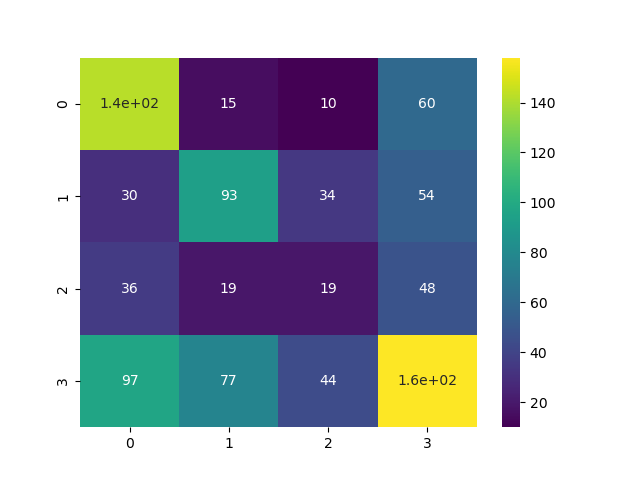

              precision    recall  f1-score   support

           0       0.47      0.63      0.53       227
           1       0.46      0.44      0.45       211
           2       0.18      0.16      0.17       122
           3       0.49      0.42      0.45       376

    accuracy                           0.44       936
   macro avg       0.40      0.41      0.40       936
weighted avg       0.44      0.44      0.43       936

[INFO] grid searching over the hyper-parameters...


/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/brinkley97/opt/anaconda3/envs/emotion_rec_from_audiovisual/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warn

[INFO] the best hyper-parameters results are...
{'C': 0.01, 'fit_intercept': True, 'loss': 'squared_hinge', 'penalty': 'l2'}

[INFO] evaluating on VALIDATION...
0.49642857142857144

[INFO] the best score...
0.5666666666666667
[INFO] classification on TEST...


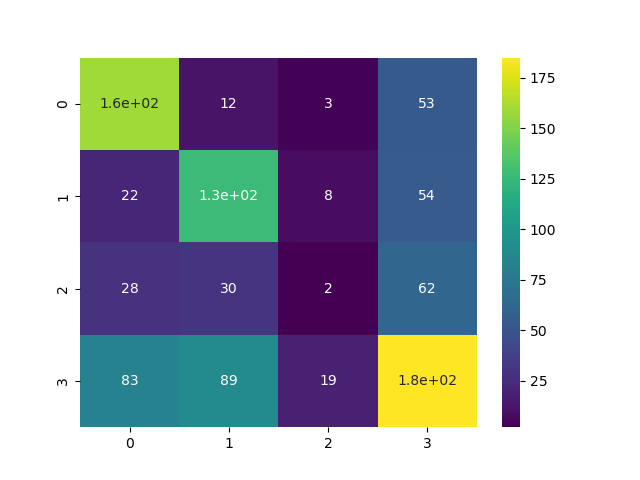

              precision    recall  f1-score   support

           0       0.54      0.70      0.61       227
           1       0.49      0.60      0.54       211
           2       0.06      0.02      0.03       122
           3       0.52      0.49      0.51       376

    accuracy                           0.51       936
   macro avg       0.41      0.45      0.42       936
weighted avg       0.46      0.51      0.48       936

[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] evaluating on TEST...
0.358974358974359
[INFO] classification on TEST...


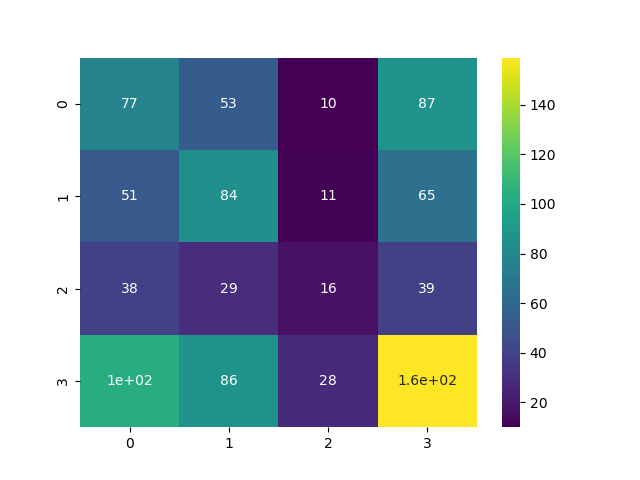

              precision    recall  f1-score   support

           0       0.29      0.34      0.31       227
           1       0.33      0.40      0.36       211
           2       0.25      0.13      0.17       122
           3       0.45      0.42      0.44       376

    accuracy                           0.36       936
   macro avg       0.33      0.32      0.32       936
weighted avg       0.36      0.36      0.36       936

[INFO] grid searching over the hyper-parameters...
[INFO] the hyper-parameters results are...
[INFO] the best hyper-parameters results are...
{'C': 0.01, 'fit_intercept': True, 'loss': 'squared_hinge', 'penalty': 'l2'}

[INFO] evaluating on VALIDATION...
0.40714285714285714

[INFO] the best score...
0.39166666666666666
[INFO] classification on TEST...


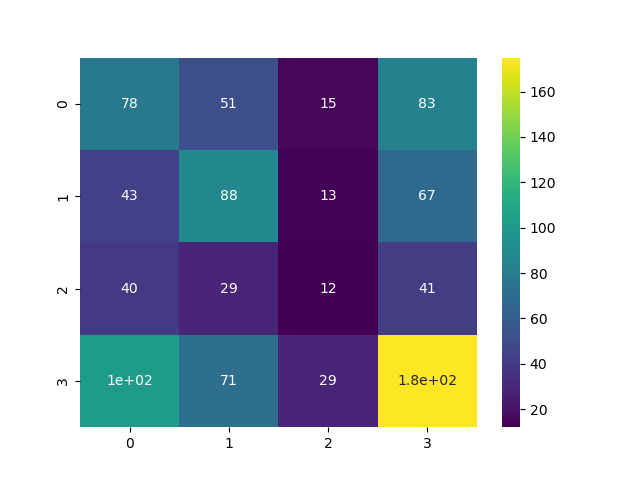

              precision    recall  f1-score   support

           0       0.30      0.34      0.32       227
           1       0.37      0.42      0.39       211
           2       0.17      0.10      0.13       122
           3       0.48      0.47      0.47       376

    accuracy                           0.38       936
   macro avg       0.33      0.33      0.33       936
weighted avg       0.37      0.38      0.37       936



In [22]:
# %load main_notebook
main.ipynb

# TODOs

## Load Data

In [23]:
audio_ys = audio_features_with_y.loc[0:, 'emotion_labels']
text_ys = text_features_with_y.loc[0:, 'emotion_labels']
visual_ys = visual_features_with_y.loc[0:, 'emotion_labels']

## 1. Reduce Temporal Dimension for Audio and Visual + Early Fusion

In [24]:
audio_reduced_temporal_dimensions, true_labels = reduce_temporal_dimension(audio_features_paths, audio_ys)
np.shape(audio_reduced_temporal_dimensions), np.shape(true_labels)

((1336, 128), (1336,))

In [25]:
loaded_text_features, true_labels = load_text_features(text_features_paths, text_ys)
np.shape(loaded_text_features), np.shape(true_labels)

((1336, 768), (1336,))

In [26]:
visual_reduced_temporal_dimensions, true_labels = reduce_temporal_dimension(visual_features_paths, visual_ys)
np.shape(visual_reduced_temporal_dimensions), np.shape(true_labels)

((1336, 2048), (1336,))

In [14]:
# a = np.arange(6).reshape(2,3)
# b = np.arange(2)
# c = np.column_stack((a, b))

# print(np.shape(a), a)
# print(np.shape(b), b)
# print(np.shape(c), c)

(2, 3) [[0 1 2]
 [3 4 5]]
(2,) [0 1]
(2, 4) [[0 1 2 0]
 [3 4 5 1]]


In [28]:
audio_text_features = np.column_stack((audio_reduced_temporal_dimensions, loaded_text_features))
np.shape(audio_text_features)

all_features = np.column_stack((visual_reduced_temporal_dimensions, audio_text_features))
np.shape(all_features)

(1336, 2944)

## 2. Perform a Unimodal 4-Class Emotion Classification

### Split Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(all_features, true_labels, test_size=0.7, random_state=42)
total_X = len(X_train) + len(X_test)
total_Y = len(y_train) + len(y_test)
len(X_train), len(X_test), len(y_train), len(y_test), total_X, total_Y

(400, 936, 400, 936, 1336, 1336)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.7, random_state=42)
total_X = len(X_train) + len(X_val)
total_Y = len(y_train) + len(y_val)
len(X_train), len(X_val), len(y_train), len(y_val), total_X, total_Y, np.shape(X_train), np.shape(y_train)

(120, 280, 120, 280, 400, 400, (120, 2944), (120,))

### Without Hyper-Parameter Tuning

[INFO] training our linear support vector classification estimator
[INFO] fitting on TRAIN...
[INFO] evaluating on TEST...
0.5160256410256411
[INFO] classification on TEST...


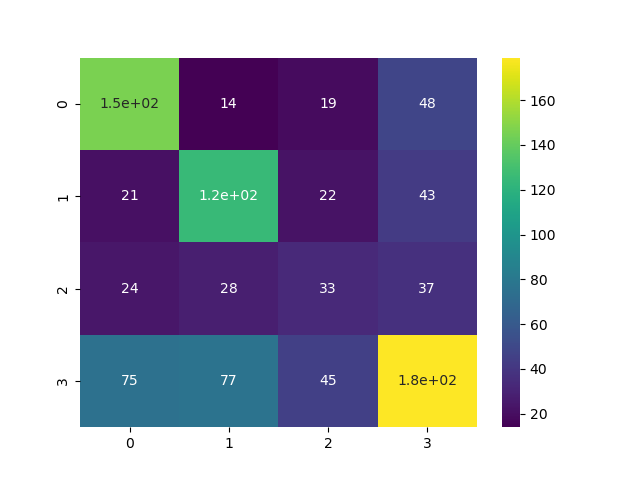

In [31]:
print("[INFO] training our linear support vector classification estimator")
classification_estimator = svm.LinearSVC()

print("[INFO] fitting on TRAIN...")
train_without_hp = classification_estimator.fit(X_train, y_train)

print("[INFO] evaluating on TEST...")
test_without_hp = train_without_hp.score(X_test, y_test)
print(test_without_hp)

print("[INFO] classification on TEST...")
# make a prediction (returns a list of 0 - 4 values)
y_pred_without_hp = train_without_hp.predict(X_test)

# show true labels and predictions
cm = confusion_matrix(y_test, y_pred_without_hp)
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()

In [32]:
print(classification_report(y_test, y_pred_without_hp))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       227
           1       0.51      0.59      0.55       211
           2       0.28      0.27      0.27       122
           3       0.58      0.48      0.52       376

    accuracy                           0.52       936
   macro avg       0.48      0.50      0.48       936
weighted avg       0.52      0.52      0.51       936



In [33]:
f1_score(y_test, y_pred_without_hp, average='micro')

0.5160256410256411

## With Hyper-Parameter Tuning

In [34]:
# initialize the LinearSVC() estimator 
classification_estimator = svm.LinearSVC(max_iter=3650)

# define the hyper-parameters to perform the grid search over
param_grid = {
    'C': [0.01, 0.1, 10, 100], 
    # 'class_weight': [1],
    # 'dual':,
    'fit_intercept': [True, False],
    # 'intercept_scaling':,
    'loss': ['hinge', 'squared_hinge'],
    # 'max_iter':,
     # 'multi_class': [1],
    # 'penalty': ['l1', 'l2'],
    'penalty': ['l2'],
    # 'random_state':,
    # 'tol': , 
    # 'verbose':    
}

print("[INFO] grid searching over the hyper-parameters...")
# perform grid search with our estimator, hyper-parameters, cross-validation
linear_classification = GridSearchCV(classification_estimator, param_grid=param_grid, cv=10)
linear_classification

[INFO] grid searching over the hyper-parameters...


GridSearchCV(cv=10, estimator=LinearSVC(max_iter=3650),
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l2']})

In [35]:
# train the model with hyperparameter tuning on all permutation parameters
train_with_hp = linear_classification.fit(X_train, y_train)

[INFO] the best hyper-parameters results are...
{'C': 0.01, 'fit_intercept': True, 'loss': 'squared_hinge', 'penalty': 'l2'}

[INFO] evaluating on VALIDATION...
0.5392857142857143

[INFO] the best score...
0.5333333333333334
[INFO] classification on TEST...


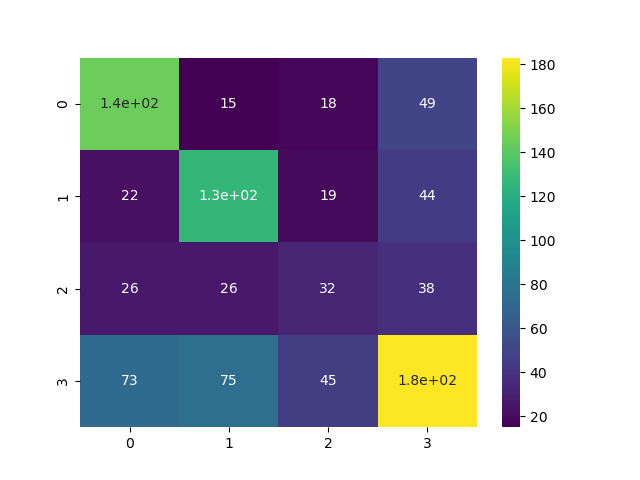

In [36]:
print("[INFO] the best hyper-parameters results are...")
best_params = train_with_hp.best_params_
print(best_params)

print("\n[INFO] evaluating on VALIDATION...")
validation_with_hp = train_with_hp.score(X_val, y_val)
print(validation_with_hp)

print("\n[INFO] the best score...")
# show the best score
print(train_with_hp.best_score_)

print("[INFO] classification on TEST...")
# make a prediction (returns a list of 0 - 4 values)
y_pred_with_hp = train_with_hp.predict(X_test)

# show true labels and predictions
cm = confusion_matrix(y_test, y_pred_with_hp)
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()

In [37]:
print(classification_report(y_test, y_pred_with_hp))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       227
           1       0.52      0.60      0.56       211
           2       0.28      0.26      0.27       122
           3       0.58      0.49      0.53       376

    accuracy                           0.52       936
   macro avg       0.48      0.50      0.49       936
weighted avg       0.52      0.52      0.52       936



## 3. Classification Results on the Visual Modality

In [38]:
visual_f1_micro = f1_score(y_test, y_pred_without_hp, average='micro')
visual_f1_micro

0.5160256410256411